In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
url=('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv')
df = pd.read_csv('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv', index_col='Date', parse_dates=True)

df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_11952\3762125351.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('https://raw.githubusercontent.com/DataScienceWorks/PredictingBicycleTraffic/master/data/FremontBridge.csv', index_col='Date', parse_dates=True)


,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [5]:
df.columns=['East','West']

In [6]:
df['Total']=df['East']+df['West']

In [7]:
df.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [8]:
df.dropna().describe()

,East,West,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50328 entries, 2012-10-03 00:00:00 to 2018-06-30 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   East    50319 non-null  float64
 1   West    50319 non-null  float64
 2   Total   50319 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;

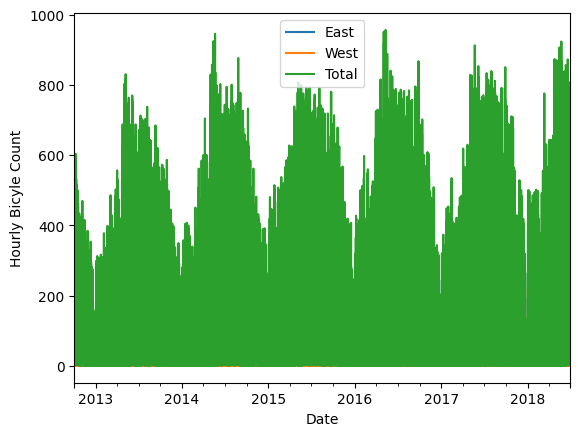

In [15]:
df.plot()
plt.ylabel('Hourly Bicyle Count');

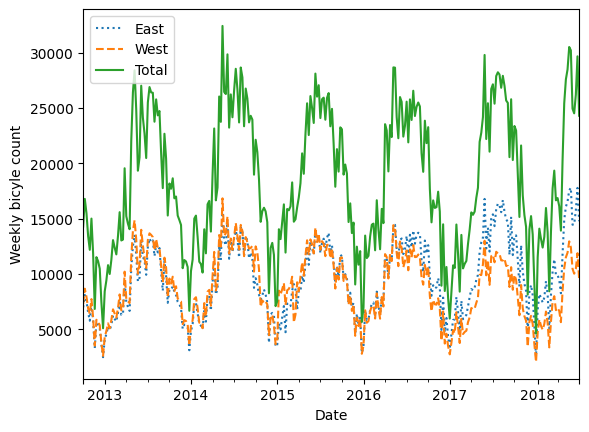

In [16]:
#resample-데이터 압축. 
#df의 데이터를 week 단위로 합계를 내서, 주간합계로 다시 산출한다. 
weekly = df.resample('W').sum()
weekly.plot(style=[':','--','-'])
#각 시리즈에대해 스타일 다르게.하나는 :점선, 하나는--대시, 하나는-그냥 실선
plt.ylabel('Weekly bicyle count');

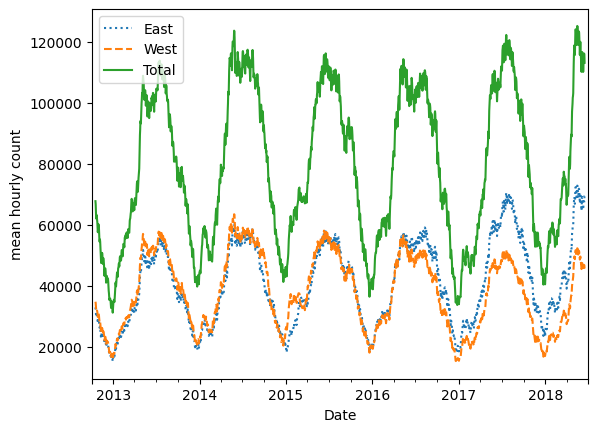

In [17]:
#시간대별로 나와있는 원본데이터를 Day별로 해서 그 데이별 합계를 daily라고 하고,
#30일 을 기준으로 이동평균선을 구할거고, 각 구간에 대해 sum을 하고, centure=True면 기준점을 중심으로 좌우 15일씩 총 30일간의 합계라고. 평균 X
daily=df.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count');

In [18]:
#인덱스 타입 체크 중요-Datetime이구만
df.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2018-06-30 14:00:00', '2018-06-30 15:00:00',
               '2018-06-30 16:00:00', '2018-06-30 17:00:00',
               '2018-06-30 18:00:00', '2018-06-30 19:00:00',
               '2018-06-30 20:00:00', '2018-06-30 21:00:00',
               '2018-06-30 22:00:00', '2018-06-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=50328, freq=None)

In [20]:
df.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

In [21]:
xticks=60*60*4*np.arange(6)
xticks

array([    0, 14400, 28800, 43200, 57600, 72000])

<Axes: xlabel='Date'>

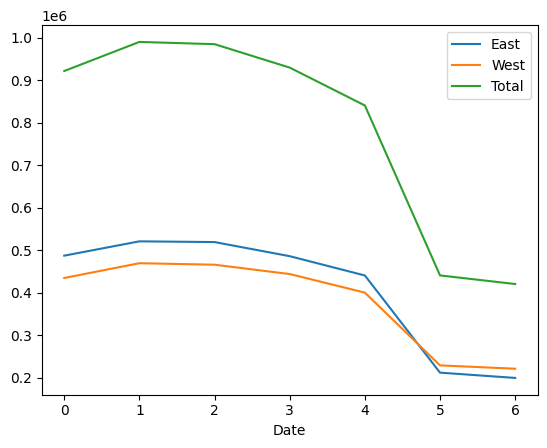

In [23]:
#월요일부터 일요일까지로(그래서 6칸) 그룹바이해서, 각 요일별의 합계를 보여준다. 
df.groupby(df.index.dayofweek).sum().plot()

<Axes: xlabel='time'>

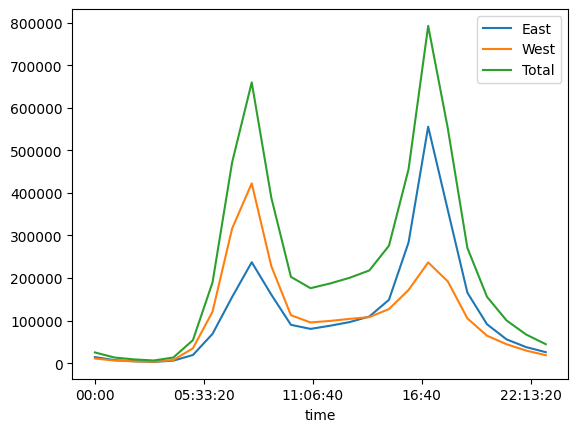

In [24]:
#시간을 기준으로 그룹바이해서 나타내는것도 재밌음!!
df.groupby(df.index.time).sum().plot()

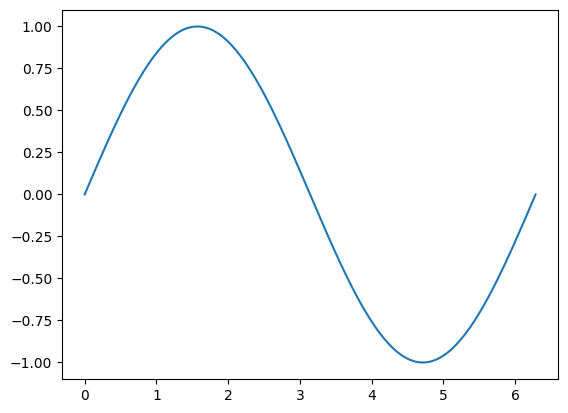

In [25]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [26]:
import matplotlib as mpl

In [27]:
plt.style.use('classic')

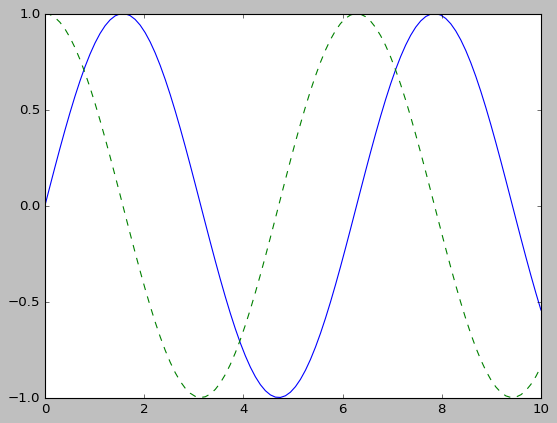

In [29]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
plt.show()

In [30]:
fig.savefig('my_figure.png')

In [31]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

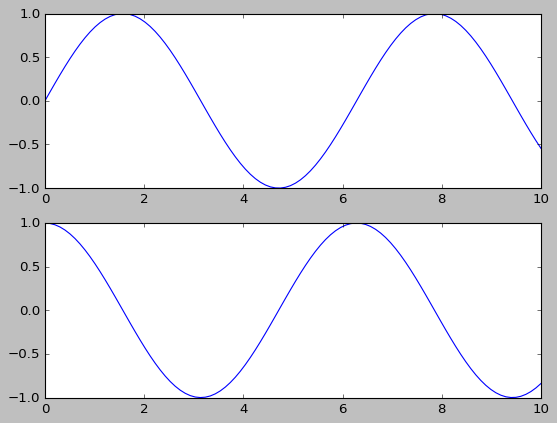

In [33]:
#figure-도화지그림 만들고, 
plt.figure()
plt.subplot(2, 1, 1) #row, columns, panel number
#전체 그림을 2개 행으로 나누고, 각 행마다 column 하나를 가지고 , 첫번째 위치에는 이렇게 만들겠다. 2행 1열의 1번위치 임을 알려줌
plt.plot(x, np.sin(x))

plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

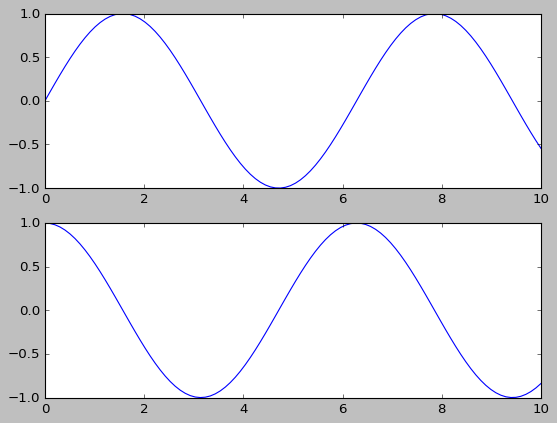

In [35]:
#먼저 플롯 그리드 생성하고, ax는 두개의 축 객체의 배열이 됨
#2개의 서브플롯(그래프)를 가진 figure도화지객체와 subplot 내용담을 그래프객체 생성 
#ax는 객체의 리스트. ax는 각각의 그래프를말함.  ax가 두개다 축이 두개다 이말이지 
fig, ax = plt.subplots(2)

#적절한 객체에서 plot() 메서드 호출
#그래프 0은 위에거지 얘는 
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [40]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [42]:
import seaborn as sns


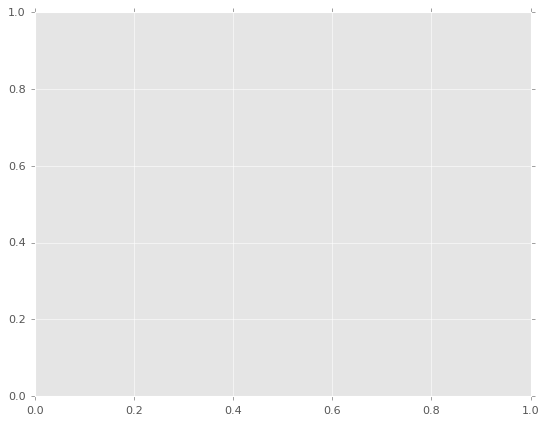

In [47]:
fig = plt.figure()
ax = plt.axes()

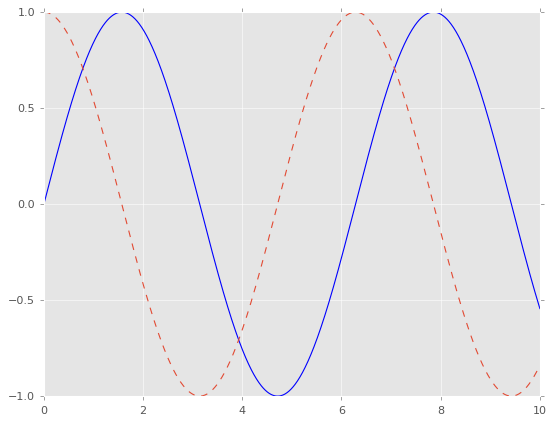

In [53]:
fig = plt.figure()
ax = plt.axes()

x=np.linspace(0, 10, 1000)
#plot은 그려라.
ax.plot(x, np.sin(x), color='blue')

y2=np.cos(x)
plt.plot(x, y2, '--')
#한번에 나타내고 싶을때는 이렇게 잡아주면됨. 


C:\Users\user\AppData\Local\Temp\ipykernel_11952\2985817930.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


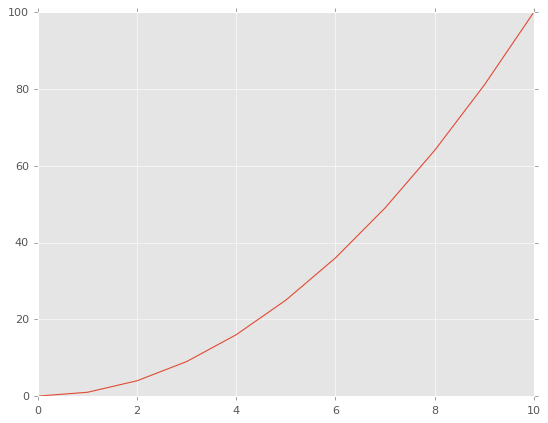

In [58]:
def my_plot():
     fig=plt.figure()
     x=np.linspace(0, 10, 11)
     y = x**2

     fig.subplots().plot(x,y)
     fig.savefig('plot1.png')
     fig.show()

my_plot()

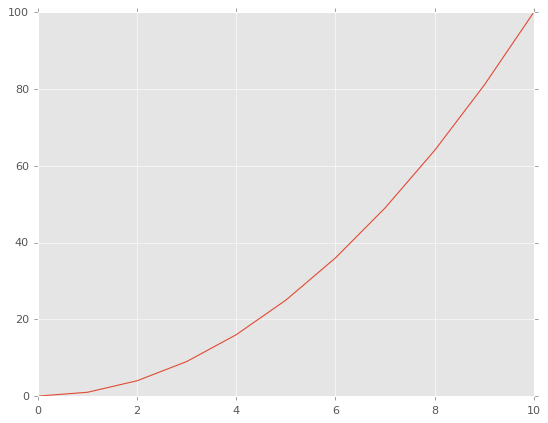

In [59]:
## 단일 서브플롯을 가진 Figure 객체와 Axes 객체를 생성합니다
#그냥 이것만 print해보면 축만 있는게 나옴 
fig, ax = plt.subplots()
#여기서의 ax는 Axes(그래프 자체라는 객체)
# 이 객체는 x축.y축.타이틀.데이터.라벨 등 모든 그래픽 요소를 포함하고 있고,
# 여러개의 axes객체를 하나의 figure 객체에 배치 가능.
# Axes 객체(ax)에 플롯을 추가합니다
#figure는 그림 전체 크기와 배경 등을 말하는거고
#직접적인 시각화하는 구역은 ax객체이므로. 실제 데이터 시각화구역은 ax
ax.plot(x,y)

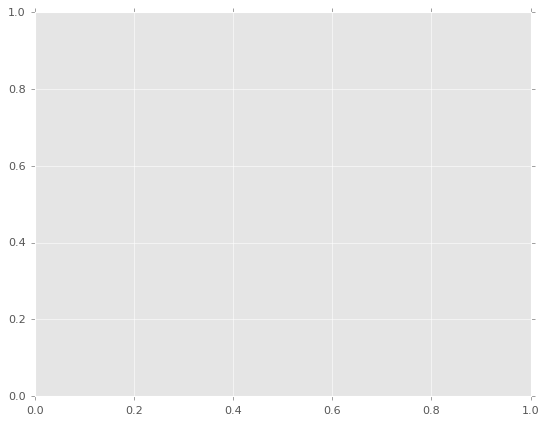

In [60]:
#기본은 그림fig과 축ax.
fig, ax = plt.subplots()


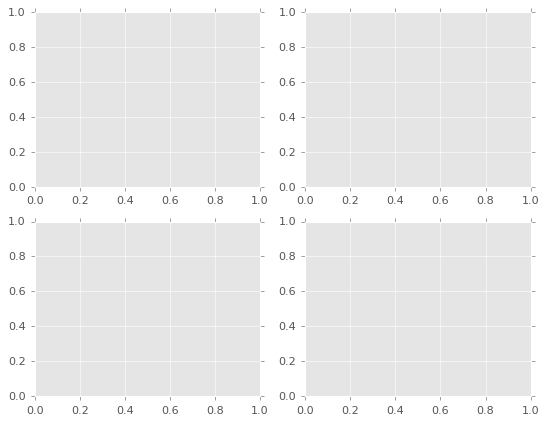

In [62]:
#2행2열그래프 위한 객체생성
fig, axs=plt.subplots(2, 2)

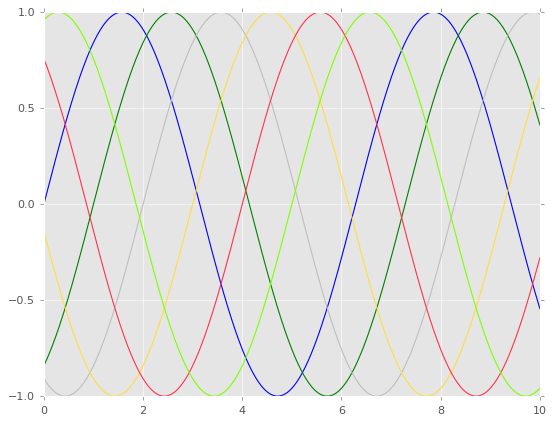

In [80]:
fig, ax = plt.subplots()
#한번에 여러개 서브플롯 만들때 subplots()
x=np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x - 0), color='blue')
plt.plot(x, np.sin(x - 1), color='g')
plt.plot(x, np.sin(x - 2), color='0.75') #0과 1사이 회색조
plt.plot(x, np.sin(x - 3), color='#FFDD44')
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) #빨간선. rgb튜플, 0과 1값
plt.plot(x, np.sin(x - 5), color='chartreuse')


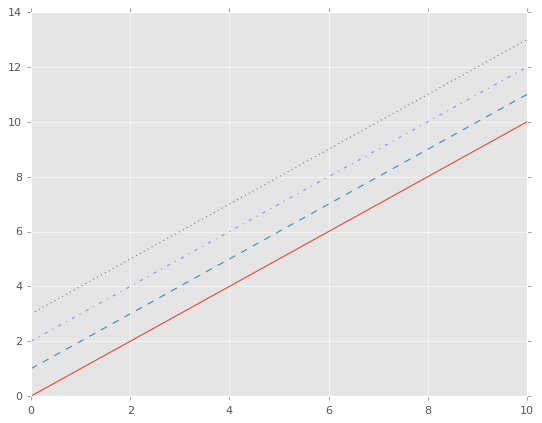

In [84]:
plt.plot(x, x+0, linestyle='-', )
plt.plot(x, x+1, linestyle='--')
plt.plot(x, x+2, linestyle='-.')
plt.plot(x, x+3, linestyle=':')

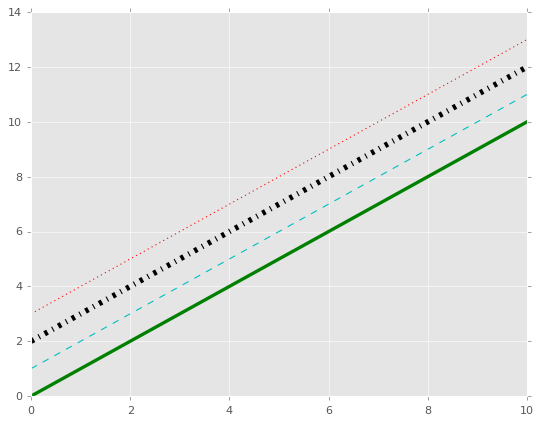

In [103]:
plt.plot(x, x+0, '-g', lw=3) #solid green, linewidth=3
plt.plot(x, x+1, '--c') #dashed cyan
plt.plot(x, x+2, '-.k', lw=5) #dashdot balck
plt.plot(x, x+3, ':r') #dotdot red

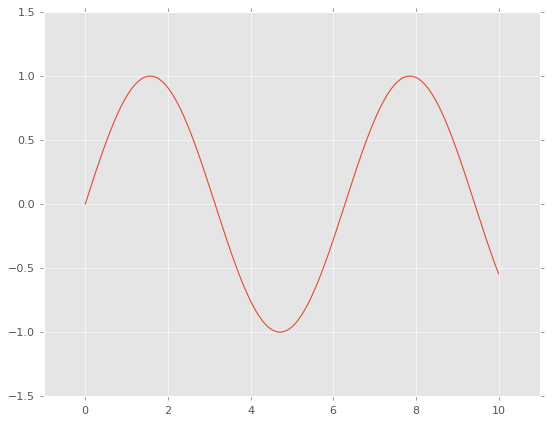

In [92]:
plt.plot(x, np.sin(x))
#matplot이 축의 범위를 자동으로 알잘해주지만 내가 이렇게 명시해주는게 나을수있음
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

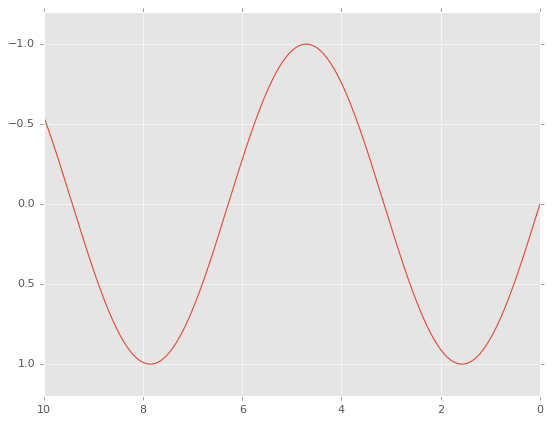

In [93]:
plt.plot(x, np.sin(x))
#두축 중 하나가 역으로 표시하려면 그냥 인수 순서 바꾸면됨. 큰수가 앞에오는걸로!! 
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

(-1.0, 11.0, -1.5, 1.5)

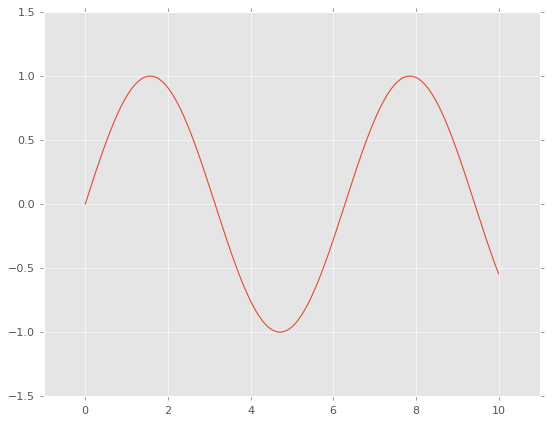

In [94]:
plt.plot(x, np.sin(x))
#axis 통해서 x축최소.x축최대.y축최소.y축최대 이렇게 설정할수도 있음 
plt.axis([-1, 11, -1.5, 1.5])

(0.0, 10.0, -0.9999972954811321, 0.9999996994977832)

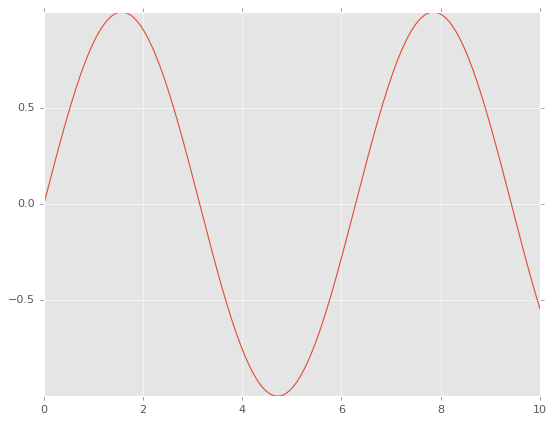

In [95]:
plt.plot(x, np.sin(x))
#tight-범위 안보이도록 타이트하게 밀착
plt.axis('tight')

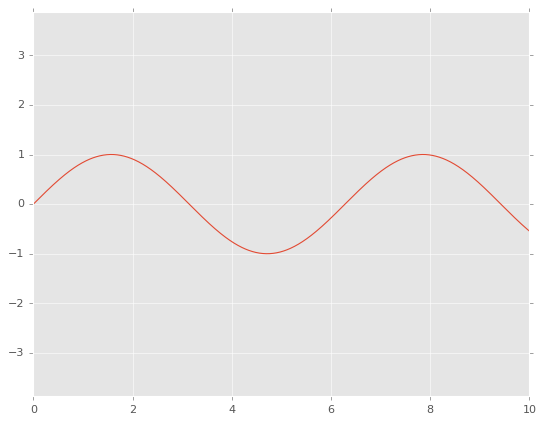

In [96]:
plt.plot(x, np.sin(x))
plt.axis('equal'); 
#가로세로 비율 균등하게 설정. 이 모든걸 하면 Y축의 범위가 변화되고 있는점!!
#이 equals를 하면 공간은 많이 남는 대신 둘다 두칸씩만 차지하고 있는걸 알수있음

Text(0, 0.5, 'sin(x)')

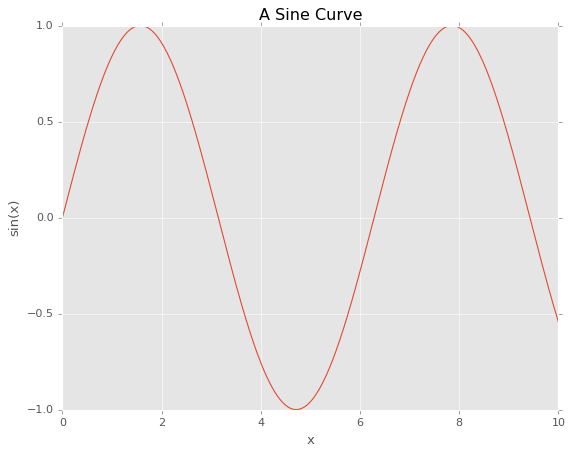

In [97]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

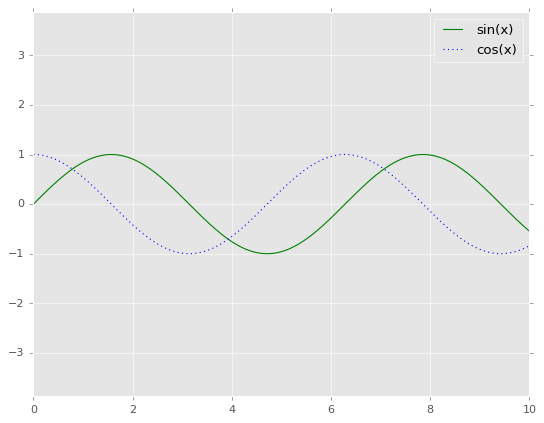

In [100]:
plt.plot(x, np.sin(x), '-g', label='sin(x)') #인식 도움주는 레이블을 뭐라고 표시할건지. 
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal') #같은칸씩 차지.

plt.legend(); #plt.legend() 함수는 플롯에 범례(legend)를 추가하는 함수

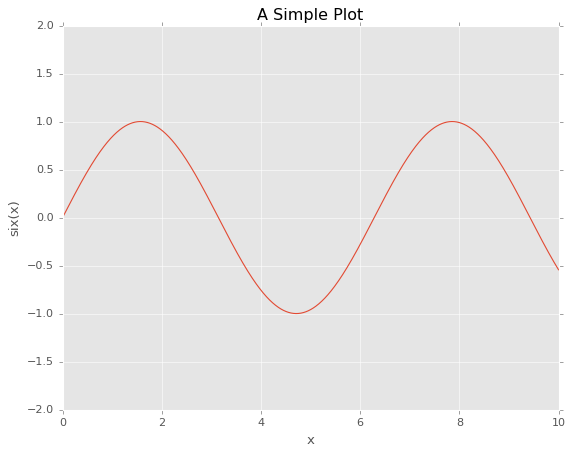

In [101]:
ax = plt.axes()
# 한번에 여러개 서브플롯 만들때 subplots()
#단일 플롯 만들때 axes. 좀더 간단함
#하나의 figure는 여러개의 axes(서브플롯)을 가질 수 있다. 
#플롯=그래프 선 이 아님. 
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2,2),
       xlabel='x', ylabel='six(x)',
       title='A Simple Plot');

C:\Users\user\AppData\Local\Temp\ipykernel_11952\828355434.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


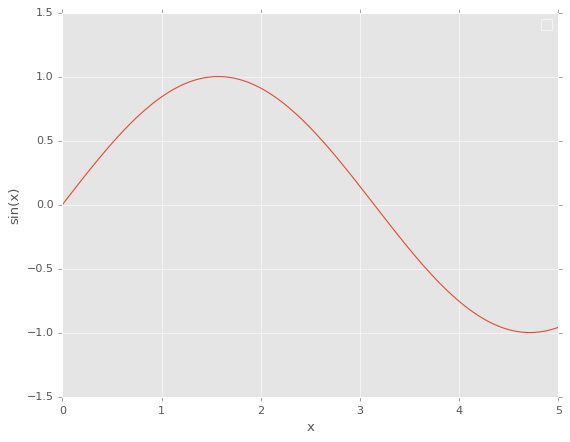

In [115]:
#Axes: 전체 그래프(플롯)를 나타내는 객체로, 여러 개의 axis를 포함하며, 플롯된 데이터, 라벨, 눈금 등을 포함.
#axis: 그래프의 각 축(X축 또는 Y축)을 나타내며, 축의 눈금, 라벨, 범위 등을 관리.
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set_xlim([0,5])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')
ax.legend()
plt.show()

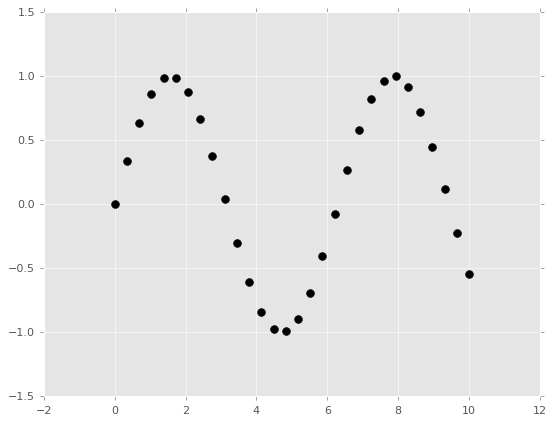

In [124]:
fig, ax=plt.subplots()
#plt.plot이 아니고 ax.scatter로 사용하기 위해서는 이렇게 ax 객체생성 해줘야 쓸수있음 
x=np.linspace(0,10,30)
y=np.sin(x)
ax.scatter(x, y, s=50, marker='o', color='black')
plt.show()

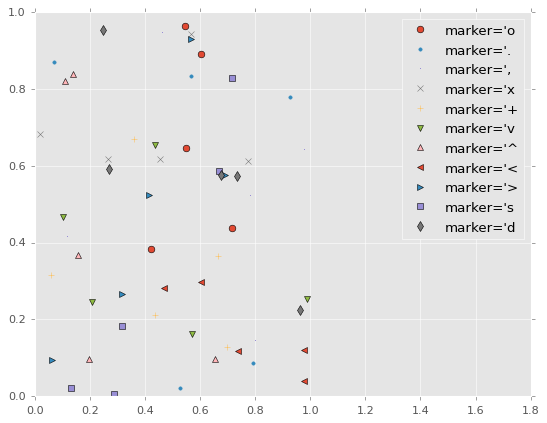

In [125]:
fig, ax=plt.subplots()
#나는 또 ax에 쓰고 싶어가꼬 객체 생성해줌 
rng=np.random.RandomState(0)
for marker in ['o','.',',','x','+','v','^','<','>','s','d']:
     ax.plot(rng.rand(5), rng.rand(5), marker, label="marker='{0}".format(marker))
     ax.legend(numpoints=1)
     ax.set_xlim(0, 1.8);

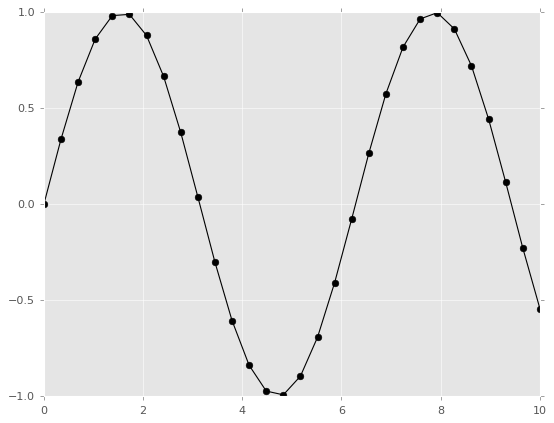

In [127]:
fig, ax=plt.subplots()
ax.plot(x, y, '-ok');

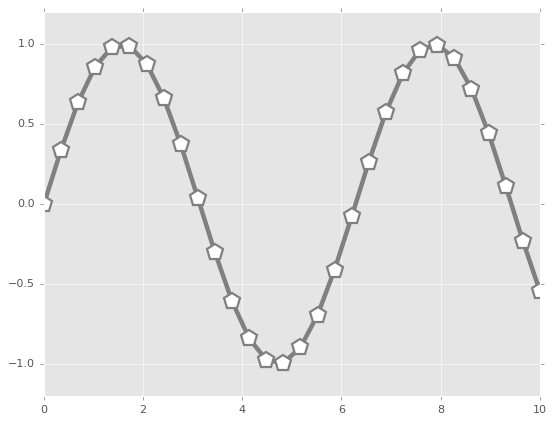

In [128]:
fig, ax=plt.subplots()
ax.plot(x, y, '-p', color='gray', markersize=15, lw=4, markerfacecolor='white', markeredgecolor='gray', markeredgewidth=2)
ax.set_ylim(-1.2,1.2);

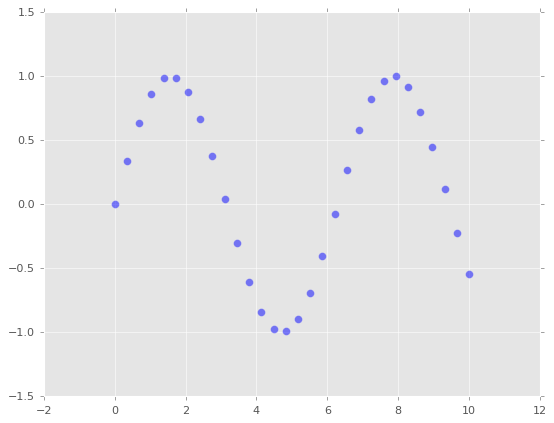

In [135]:
fig, ax=plt.subplots() 
ax.scatter(x,y, s=50, marker='o', alpha=0.5) #alpha로 투명도 조절 

In [139]:
pip install scikit-learn

     --------------------                    5.7/11.0 MB 213.2 kB/s eta 0:00:25
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "c:\Users\user\AppData\Local\Programs\Python\Python39\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "c:\Users\user\AppData\Local\Programs\Pyth

In [144]:
import sklearn

In [145]:
from sklearn.datasets import load_iris

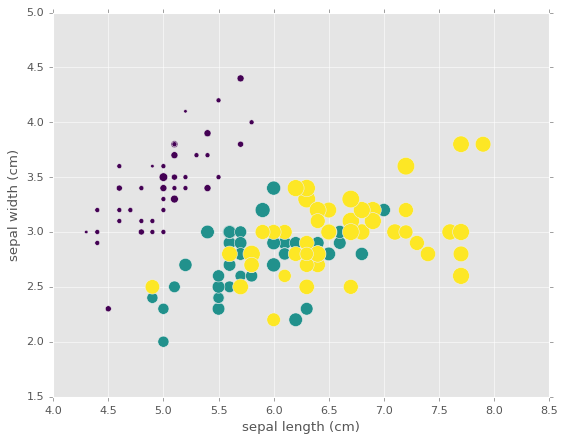

In [147]:
iris=load_iris()
features=iris.data.T

plt.scatter(features[0], features[1],
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

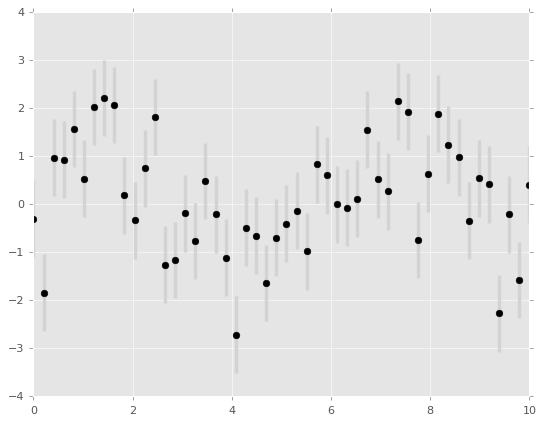

In [149]:
x=np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x)+dy*np.random.randn(50)
#errorbar 오차 막대! 
plt.errorbar(x, y, yerr=dy, fmt='o',color='black', 
             ecolor='lightgray',elinewidth=3, capsize=0 );

In [153]:
def f(x,y):
     return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [154]:
x = np.linspace(0, 5, 50) #0부터 5까지 값을 50개로나눔
y = np.linspace(0, 5, 40)

#meshgrid는 1차원 배열로부터 2차원 그리드를 만들어줌. 
X, Y=np.meshgrid(x,y)
Z = f(X, Y)

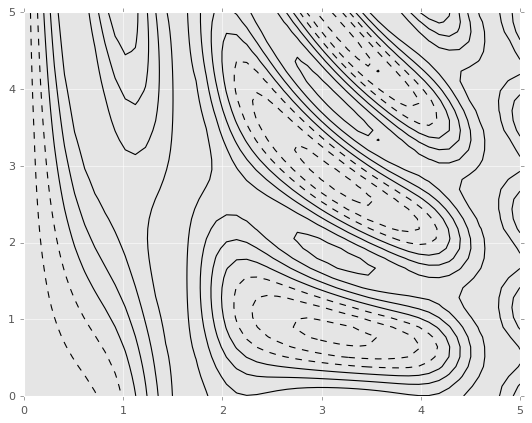

In [156]:
plt.contour(X, Y, Z, colors='black');
#자동적으로 양수는 실선, 음수는 점선으로 표시된다. 

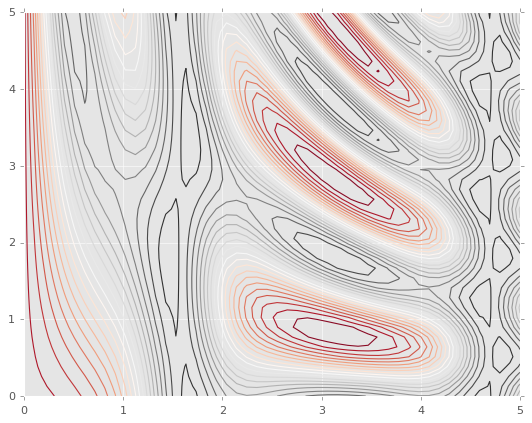

In [157]:
plt.contour(X, Y, Z,20, cmap='RdGy');

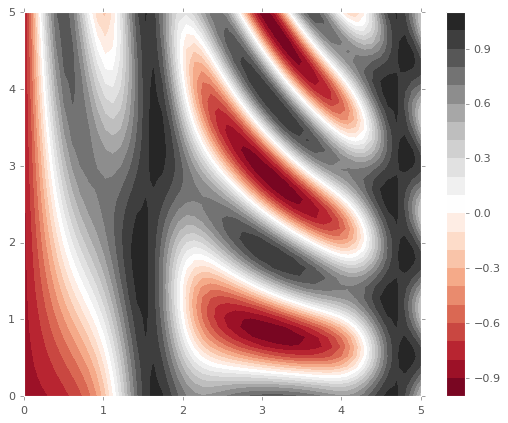

In [160]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
#colorbar를 통해서 색상 정보 레이블 축을 오른쪽에 만들어준다. 
plt.colorbar();

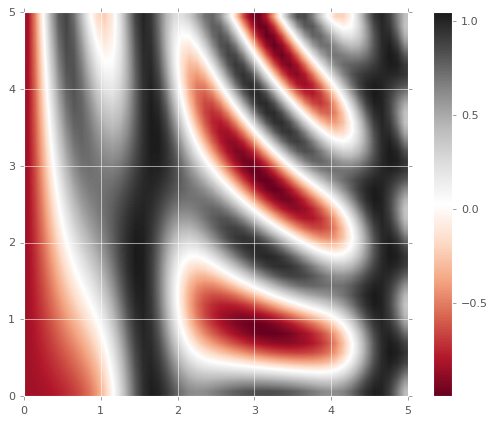

In [163]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar();

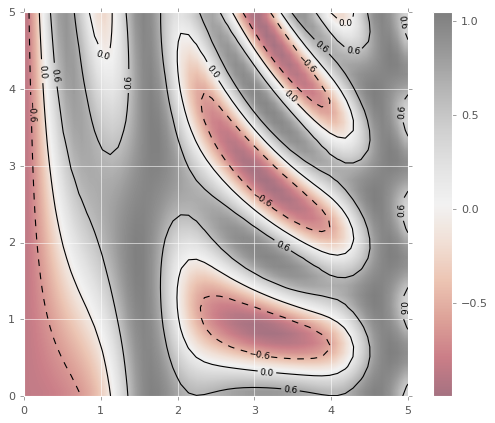

In [164]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar()

<a list of 20 text.Text objects>

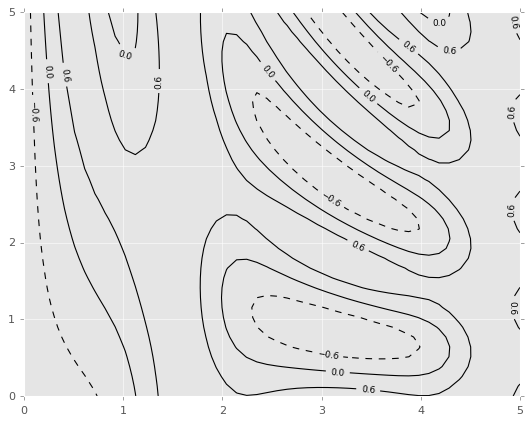

In [165]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)


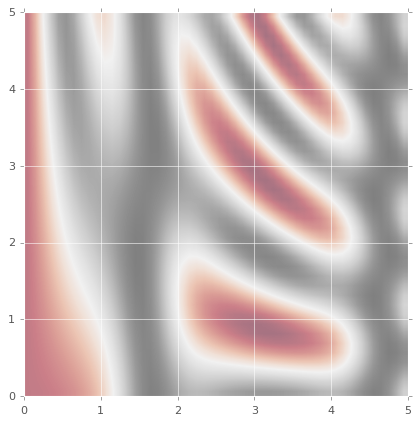

In [166]:

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)

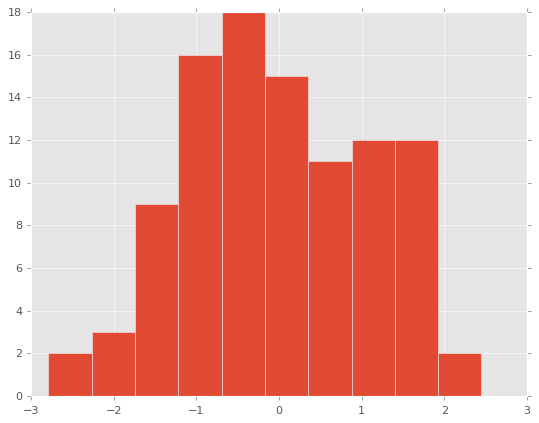

In [167]:
data = np.random.randn(100)
plt.hist(data);

(array([0.11921916, 0.05960958, 0.05960958, 0.05960958, 0.        ,
        0.05960958, 0.        , 0.17882874, 0.05960958, 0.23843832,
        0.17882874, 0.17882874, 0.17882874, 0.23843832, 0.17882874,
        0.47687665, 0.53648623, 0.65570539, 0.41726707, 0.29804791,
        0.35765749, 0.11921916, 0.47687665, 0.        , 0.35765749,
        0.        , 0.17882874, 0.17882874, 0.05960958, 0.05960958]),
 array([-2.8677247 , -2.69996644, -2.53220817, -2.3644499 , -2.19669164,
        -2.02893337, -1.8611751 , -1.69341684, -1.52565857, -1.3579003 ,
        -1.19014204, -1.02238377, -0.8546255 , -0.68686723, -0.51910897,
        -0.3513507 , -0.18359243, -0.01583417,  0.1519241 ,  0.31968237,
         0.48744063,  0.6551989 ,  0.82295717,  0.99071543,  1.1584737 ,
         1.32623197,  1.49399023,  1.6617485 ,  1.82950677,  1.99726503,
         2.1650233 ]),
 [<matplotlib.patches.Polygon at 0x21d3c154520>])

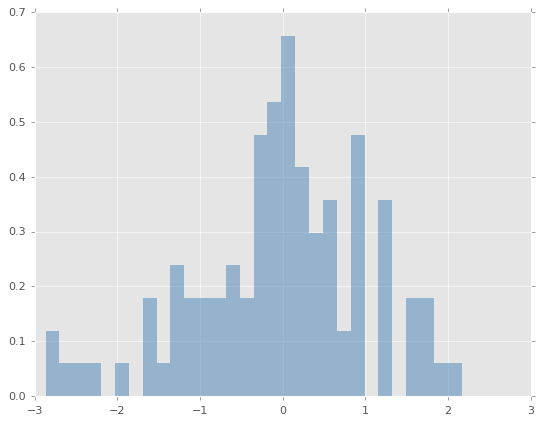

In [171]:
data = np.random.randn(100)
#쉽게 보고 싶을때 hist를 그리면 바로 데이터를 볼수있겠지 read_csv를 시각으로 본다는 것처럼.. 
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

(array([0.00268201, 0.        , 0.        , 0.        , 0.00268201,
        0.00804604, 0.01341007, 0.01609208, 0.05095826, 0.04291222,
        0.08046041, 0.08850645, 0.07241437, 0.12873665, 0.1582388 ,
        0.14482874, 0.16092082, 0.20383304, 0.20651505, 0.19578699,
        0.16092082, 0.16092082, 0.1582388 , 0.1582388 , 0.10728054,
        0.06973235, 0.07241437, 0.06705034, 0.04827625, 0.0402302 ,
        0.02145611, 0.01072805, 0.00536403, 0.00536403, 0.00536403,
        0.00268201, 0.00804604, 0.        , 0.        , 0.00268201]),
 array([-4.15401954, -3.78116536, -3.40831117, -3.03545699, -2.6626028 ,
        -2.28974862, -1.91689444, -1.54404025, -1.17118607, -0.79833189,
        -0.4254777 , -0.05262352,  0.32023067,  0.69308485,  1.06593903,
         1.43879322,  1.8116474 ,  2.18450159,  2.55735577,  2.93020995,
         3.30306414,  3.67591832,  4.0487725 ,  4.42162669,  4.79448087,
         5.16733506,  5.54018924,  5.91304342,  6.28589761,  6.65875179,
         7.03160

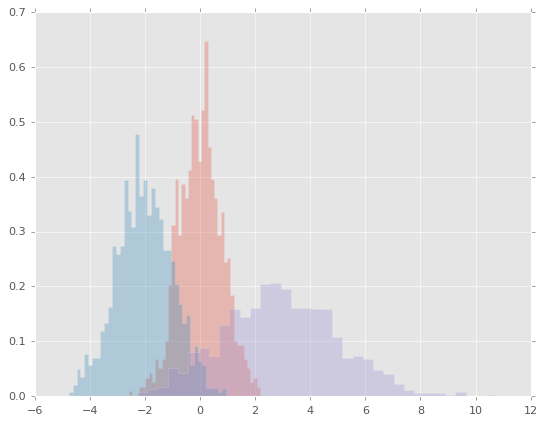

In [174]:
x1 = np.random.normal(0, 0.8, 1000)
x2=np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
#다중 히스토그램을 겹쳐서 표현한 플로팅.(histtype='stepfilled' 이거를 하면 겹쳐서 쓰겠다
kwargs=dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [175]:
#histogram 함수 - 특정 구간에 해당하는 점의 갯수를 세어줌 
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 6 14 38 28 14]


In [182]:
#multivariate_normal 경향성있는것처럼 값 생성해주는함수.
mean = [0,0]
cov=[[1,1],[1,2]]
x,y= np.random.multivariate_normal(mean, cov, 10000).T

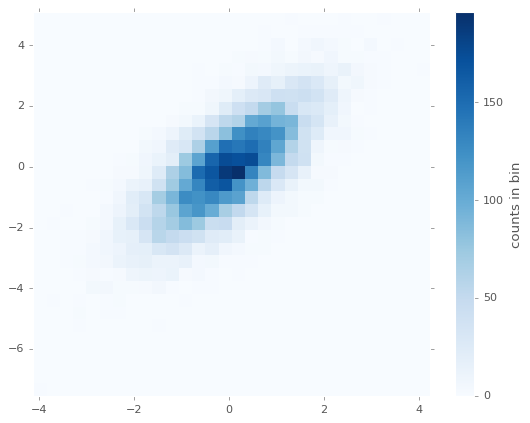

In [181]:
#2차원 히스토그램! 
#bins=30이면 데이터의 범위를 30구간으로 나누어서 표시한다. x축 y축 모두!!
plt.hist2d(x, y, bins=30, cmap='Blues')
cb=plt.colorbar()
cb.set_label('counts in bin')

In [183]:
titanic=sns.load_dataset('titanic')

In [184]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: >

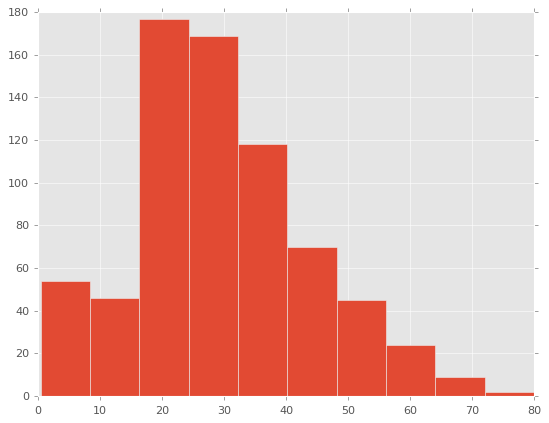

In [185]:
titanic.age.hist()

<Axes: >

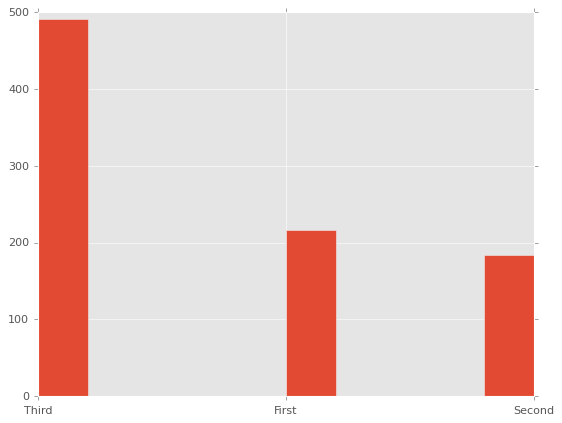

In [188]:
titanic['class'].hist()

In [189]:
iris.data.shape

(150, 4)

In [190]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [191]:
#iris에서 target==0값인거는 모두몇갠지알고싶어용
iris.data[iris.target==0].shape

(50, 4)

In [193]:
iris.data[iris.target==1].shape

(50, 4)

In [194]:
iris.data[iris.target==2].shape

(50, 4)

(array([ 1.,  0.,  5.,  5.,  8.,  9., 10.,  5.,  1.,  6.]),
 array([4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. , 7.3, 7.6, 7.9]),
 <BarContainer object of 10 artists>)

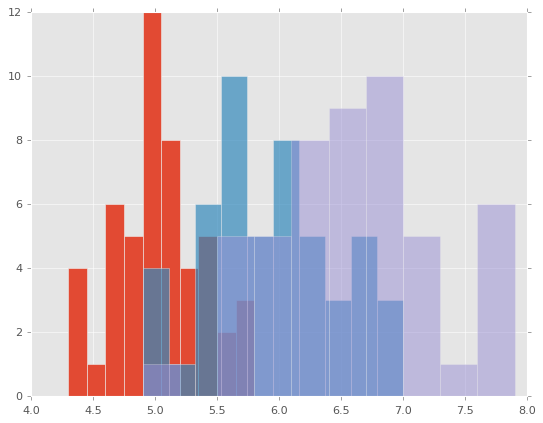

In [198]:
plt.hist(iris.data[iris.target==0, 0])
plt.hist(iris.data[iris.target==1, 0], alpha=0.7)
plt.hist(iris.data[iris.target==2, 0], alpha=0.5)

범례 맞춤 변경

In [199]:
import matplotlib.pyplot as plt
plt.style.use('classic')

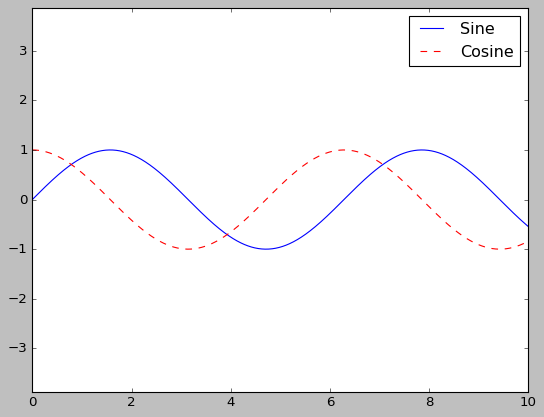

In [200]:
%matplotlib inline
x=np.linspace(0, 10, 1000)
fig, ax=plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg=ax.legend()

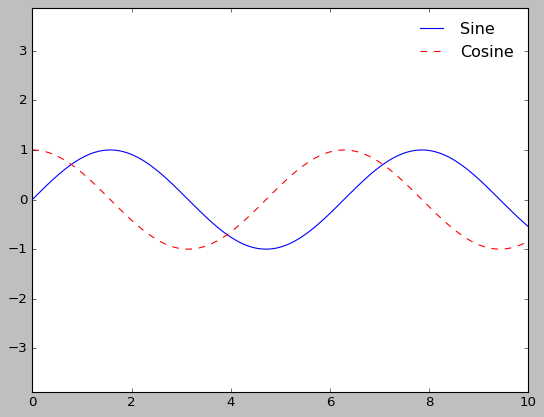

In [215]:
#legend(범례)의 위치 변경하고, frame 없앰!!! loc로 위치조정***
ax.legend(loc='best', frameon=False)
fig

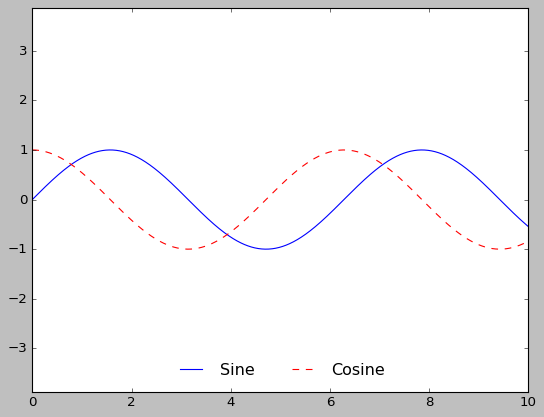

In [203]:
#ncol을 통하여 보통 1열인데..그걸 옆으로 늘어지게 2열짜리를 만들겠다. 
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

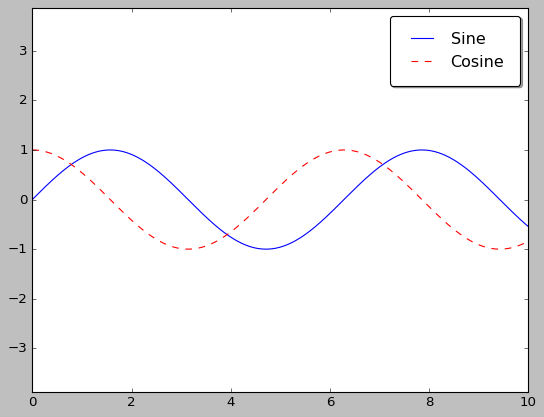

In [204]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

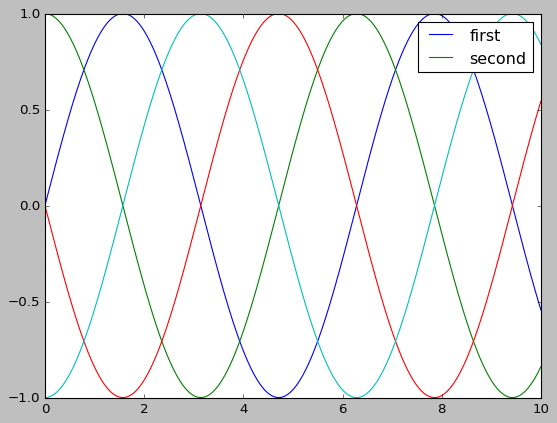

In [205]:
y=np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5)) #0과 2 사이에 0.5씩. 
#x를 x축으로, y를 y축으로 하는 plot 생성하고 그 결과를 lines 변수에 저장함
lines = plt.plot(x, y)
#legend에 두개의 범례를 추가하는데, 아까 lines 중에서 앞에서 두개 걔를 잡아가지고 first랑 second로. 
plt.legend(lines[:2], ['first', 'second']);

In [207]:
ct=pd.read_csv('./california_cities.csv')

In [211]:
lat, lon=ct.latd, ct.longd
ct.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [212]:
pop, area = ct['population_total'], ct['area_total_km2']

Text(0.5, 1.0, 'california_cities: Area and Population')

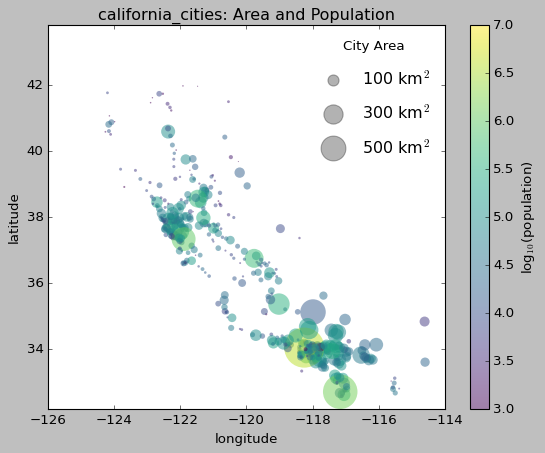

In [214]:
plt.scatter(lon, lat, label=None, 
            c=np.log10(pop), cmap='viridis',
            s=area, lw=0, alpha=0.5)
#s는 데이터 포인터의 크기, area변수에 따라 다르게 지정하겠다.
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
#컬러맵의 범위 설정
plt.clim(3,7)
#면적이 100, 300, 500 km^2 인 지역을 나타내기 위해 빈 산점도를 추가
for area in [100, 300, 500]:
     plt.scatter([], [], c='k', alpha=0.3, s=area,
                 label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, title='City Area')

plt.title('california_cities: Area and Population')

컬러 변경 

In [216]:
plt.style.use('classic')

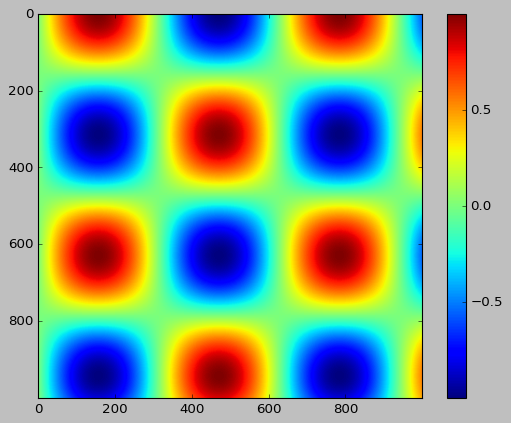

In [217]:
x=np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

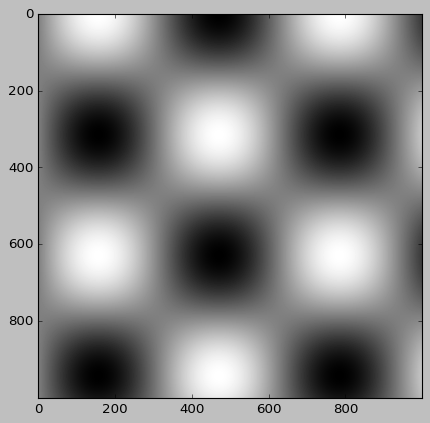

In [218]:
plt.imshow(I, cmap='gray');

In [219]:
from matplotlib.colors import LinearSegmentedColormap

NameError: name 'colors_orig' is not defined

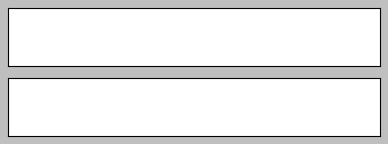

In [222]:
def grayscale_cmap(cmap):
     cmap=plt.cm.get_cmap(cmap)
     colors=cmap(np.arange(cmap.N))

     RGB_weight=[0.299, 0.587, 0.114]
     luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
     colors[:, :3] = luminance[:, np.newaxis]

     return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
     cmap_orig =plt.cm.get_cmap(cmap)
     colors_orig = cmap_orig(np.linspace(0, 1, cmap_orig.N))
     cmap_gray =grayscale_cmap(cmap)
     colors_gray =cmap(np.arange(cmap.N))

fig, ax=plt.subplots(2, figsize=(6,2),
                     subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow([colors_orig], extent=[0, 10, 0, 1])
ax[1].imshow([colors_gray], extent=[0, 10, 0, 1])


In [223]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

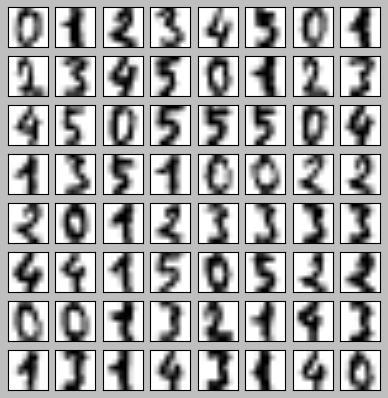

In [225]:
fig, ax = plt.subplots(8, 8, figsize=(6,6))
for i, axi in enumerate(ax.flat):
     axi.imshow(digits.images[i], cmap='binary')
     axi.set(xticks=[], yticks=[])

In [226]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


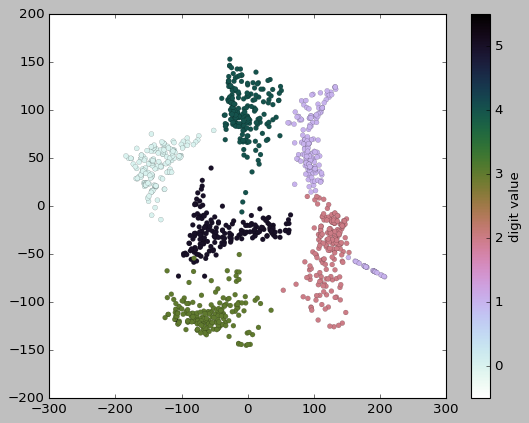

In [229]:
plt.scatter(projection[:,0], projection[:,1], lw=0.1,
            c=digits.target, cmap='cubehelix_r')
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)